# Classwork 3 - Regression modeling in R - a second pass

The following dataset containts measurements related to the impact of three advertising medias on sales of a product, $P$. The variables are:

- `youtube`: the advertising budget allocated to YouTube. Measured in thousands of dollars;

- `facebook`: the advertising budget allocated to Facebook. Measured in thousands of dollars; and

- `newspaper`: the advertising budget allocated to a local newspaper. Measured in thousands of dollars.

- `sales`: the value in the $i^{th}$ row of the sales column is a measurement of the sales (in thousands of units) for product $P$ for company $i$.

The advertising data treat "a company selling product $P$" as the statistical unit, and "all companies selling product $P$" as the population. We assume that the $n = 200$ companies in the dataset were chosen at random from the population (a strong assumption!).

In [ ]:
library(ggplot2)

marketing = read.csv('marketing_data.csv')
# length(marketing)
head(marketing)
n = dim(marketing)[1]; p = dim(marketing)[2] - 1

[1] 4

,youtube,facebook,newspaper,sales
,<dbl>,<dbl>,<dbl>,<dbl>
1,276.12,45.36,83.04,26.52
2,53.40,47.16,54.12,12.48
3,20.64,55.08,83.16,11.16
4,181.80,49.56,70.20,22.20
5,216.96,12.96,70.08,15.48
6,10.44,58.68,90.00,8.64


Note that, before an analysis, one should explore the data. We did this in "Classwork 2: Regression modeling in R".

### Sums of squares and $R^2$ for simple linear regression

First, let's fit the same model that we fit in the previous notebook (but to the entire dataset, rather than just a training set). In addition to running a summary of the model (using `summary()`), we'll also run an "analysis of variance", using the `anova()` function. The analysis of variance decomposes the total variability ($TSS$) into the explained variability ($ESS$), and the residual/unexplained variability ($RSS$). It also produces an "F-test" that we'll learn how to interpret in the next module.

In [ ]:
lm_marketing = lm(sales ~ facebook, data = marketing)
summary(lm_marketing)
anova(lm_marketing)


Call:
lm(formula = sales ~ facebook, data = marketing)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.8766  -2.5589   0.9248   3.3330   9.8173 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.17397    0.67548  16.542   <2e-16 ***
facebook     0.20250    0.02041   9.921   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.13 on 198 degrees of freedom
Multiple R-squared:  0.332,	Adjusted R-squared:  0.3287 
F-statistic: 98.42 on 1 and 198 DF,  p-value: < 2.2e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
facebook,1,2590.084,2590.08365,98.42159,4.354966e-19
Residuals,198,5210.611,26.31621,NA,NA


From the output, we see that:

- $(SSR) ESS \approx 2,590.1$
- $(SSE) RSS \approx 5,210.6$
- $(SST) TSS \approx 2,590.1 + 5,210.6 = 7,800.7$

#### Computing regression quantities "by hand"

Let's connect the `lm()` function output to the computations that we studied in a previous lecture.

In [ ]:
# 1) CODE HERE
SSE_RSS =  sum(residuals(lm_marketing)^2)           # sum((y-y_hat)^2)
SSR_ESS =  sum((fitted(lm_marketing) - mean(marketing$sales))^2)  # sum((yhat-y_bar)^2)
# SST_TSS =  with(marketing, sum((sales-mean(sales))^2))
SST_TSS = sum(((marketing$sales) -mean(marketing$sales))^2) # sum((y-y_bar)^2)
# SSE_RSS
# SSR_ESS
# SST_TSS

# R2 = 1 - SSE_RSS/SST_TSS
# R2

# sigma_hat^2 = SSE/n-2 n-2 = n-1-1 where p is 1 for SLR
# sigma_hat^2 = SSE/n-p-1 where p is the number of predictors
p = 1
sigma_hat = sqrt(SSE_RSS/(n-p-1))
sigma_hat
n-p-1

[1] 5.129933

[1] 198

## Multiple linear regression

Now, let's include the other predictors in our regression model.

In [ ]:
# 2) CODE HERE

lm_marketing_MLR = lm(sales~., data = marketing)
summary(lm_marketing_MLR)


Call:
lm(formula = sales ~ ., data = marketing)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.5932  -1.0690   0.2902   1.4272   3.3951 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.526667   0.374290   9.422   <2e-16 ***
youtube      0.045765   0.001395  32.809   <2e-16 ***
facebook     0.188530   0.008611  21.893   <2e-16 ***
newspaper   -0.001037   0.005871  -0.177     0.86    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.023 on 196 degrees of freedom
Multiple R-squared:  0.8972,	Adjusted R-squared:  0.8956 
F-statistic: 570.3 on 3 and 196 DF,  p-value: < 2.2e-16


First, note that the intercept and `facebook` parameter estimates have changed. The reason for these changes is the fact that we've now introduced new variables that explain some variability in `sales`.

- If the model is correct, a company with no Facebook, YouTube, or newspaper advertising budget can expect to sell $\widehat\beta_0 \times 1,000 \approx 3.53 \times 1,000 = 3,530$ units of product $P$. Notice that this is down from $\approx 11,174$ units in our previous simple linear regression model. Different models can have very different predictions and explanations, so it's important to attempt to find a good model! We'll focus more on the problem of model selection later in the course.

- If the model is correct, then, for a $\$1,000$ increase in the Facebook advertising budget, a company can expect to sell roughly $\widehat\beta_1 \times 1000 = 0.19 \times 1,000 = 190$ more unts, on average, *adjusting for YouTube and newspaper advertising budgets.* The adjustment is important: what we mean here is that the YouTube and newspaper advertising budgets can be held at a constant value, and the $190$ unit change is the specific change associated with the Facebook advertising budget. (Similar interpretations can be made for `youtube` and `newspaper`.)

- Recall the interpretation of "multiple R-squared", $R^2$: assuming the linear model is correct, $R^2$ is the proportion of observed variability in `sales` that can be explained by the linear regression model.
    - For the simple linear regression model, $R^2 \approx 0.33$. Assuming that the model is correct (but it likely isn't!), only about $33\%$ of the variability in sales of $P$ can be explained by the Facebook advertising budget.

    - For the multiple linear regression model, $R^2$ increases sharply to $0.90$. We should be caseful in comparing $R^2$ across models with a different number of predictors; $R^2$ will always increase when adding a predictor. What we'd really like to know is whether that increase is important enough to attribute to a real relationship between the added precitors and the response.
    
    - "Adjusted-$R^2$", which adjusts for the number of predictors in each model, is meant to compare models of different sizes. The sharp increase in the adjusted-$R^2$ suggests that adding `youtube`  and `newspaper` did, in fact, explain significantly more of the variability. We'll study the adjusted- $R^2$ more later in the course.

### Sums of squares and $R^2$ for multiple linear regression

Note that we can compute the sums of squares for multiple linear regression in the same was as for simple linear regression.

In [ ]:
# 3) CODE HERE
SSE_RSS =  sum(residuals(lm_marketing_MLR)^2)           # sum((y-y_hat)^2)
SSR_ESS =  sum((fitted(lm_marketing_MLR) - mean(marketing$sales))^2)  # sum((yhat-y_bar)^2)
# SST_TSS =  with(marketing, sum((sales-mean(sales))^2))
SST_TSS = sum(((marketing$sales) - mean(marketing$sales))^2) # sum((y-y_bar)^2)
cat("SSE: ", SSE_RSS)
cat("\nSSR: ", SSR_ESS)
cat("\nSST: ", SST_TSS)
R2 = 1 - SSE_RSS/SST_TSS
cat("\nR2: ", R2)



# sigma_hat^2 = SSE/n-2 n-2 = n-1-1 where p is 1 for SLR
# sigma_hat^2 = SSE/n-p-1 where p is the number of predictors (MLR)

p = 3 # here there are three predictors(features) are involved [facebook, youtube, newspaper]
sigma_hat = sqrt(SSE_RSS/(n-p-1))
cat("\nSigma_hat: ",sigma_hat)
cat("\nDegrees of Freedom: ",n-p-1)

anova(lm_marketing_MLR)

SSE:  801.8284
SSR:  6998.866
SST:  7800.694
R2:  0.8972106
Sigma_hat:  2.022612
Degrees of Freedom:  196

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
youtube,1,4773.0501603,4773.0501603,1.166731e+03,1.809337e-84
facebook,1,2225.6879084,2225.6879084,5.440501e+02,1.882722e-58
newspaper,1,0.1277527,0.1277527,3.122805e-02,8.599151e-01
Residuals,196,801.8283786,4.0909611,NA,NA


## Non-identifiability: a simulation

A linear regression model will have non-identifiable parameters when the matrix $\left(X^TX\right)^{-1}$ does not exist, where $X$ is the design matrix. $\left(X^TX\right)^{-1}$ does not exist when the columns of $X$ are linearly dependent.

Let's simulate such a situation.

*An aside: simulations are an invaluable tool in statistics and data science. In a simulation, we construct a dataset ourselves, rather than collect it from the world. In doing so, we know how the data were generated. With the simulated data (sometimes called "synthetic data"), we can fit various models - models that are correct, and models that are incorrect - and study how those models perform on data with known relationships.*

Let's start out by simulating data in the following way. Let $Y_i = 2 + 3x_{i,1} + \varepsilon_i$,  where $\varepsilon_i \overset{iid}{\sim} N(0, 0.5^2)$,  $i = 1,...,n$, and $n = 75$. We'll generate the predictors, $x_i$ randomly from the interval $(0,1)$. This model will be identifiable.

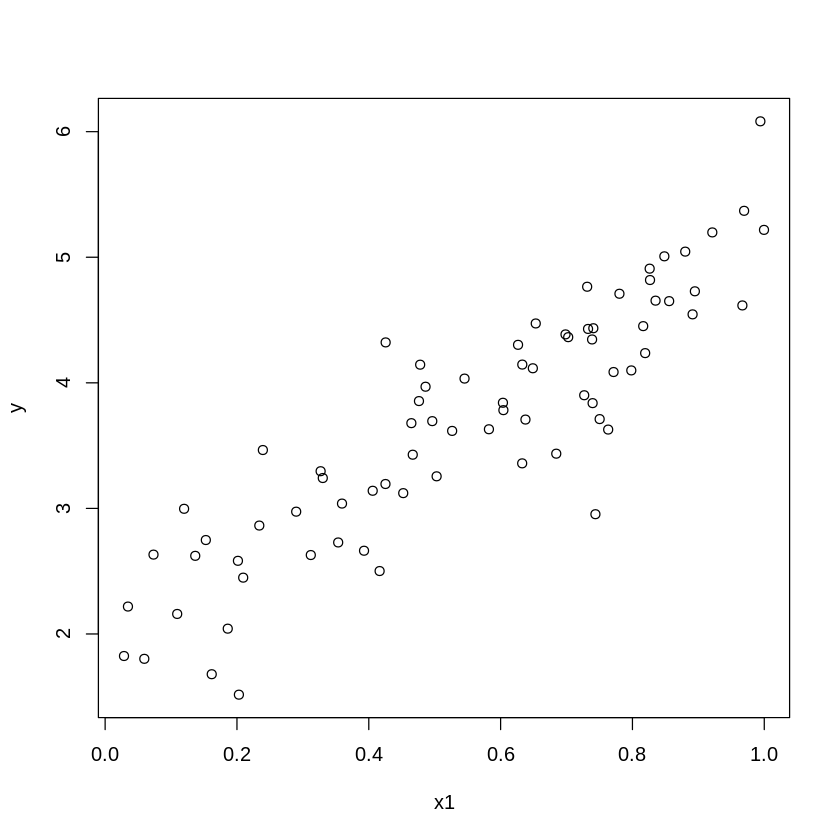

In [1]:
# 4) CODE HERE
n = 75
sigma = 0.5
e = rnorm(75, 0, sigma)

beta0 = 2
beta1 = 3

x1 = runif(n, 0, 1)
y = beta0 + beta1*x1 + e
plot(x1, y)

Now that we've simulated the data, let's fit a simple linear regression model to the data. We know that the model will be correct, because we know how the data were generated...we generated it!

In [2]:
# 5) CODE HERE
slr_mod = lm(y~x1)
summary(slr_mod)


Call:
lm(formula = y ~ x1)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.35540 -0.28493  0.01849  0.28994  1.03654 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.9160     0.1161   16.50   <2e-16 ***
x1            3.2175     0.1901   16.92   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4413 on 73 degrees of freedom
Multiple R-squared:  0.7968,	Adjusted R-squared:  0.7941 
F-statistic: 286.3 on 1 and 73 DF,  p-value: < 2.2e-16


So far, there is nothing alarming in the summary output, because we've fit the correct linear model. Now, let's add a second predictor, $x_{i,2}$, such that $x_{i,2} = 2x_{i,1}$, and $Y_i = 2 + 3x_{i,1} + 2x_{i,2} + \varepsilon_i$ (same assumptions on $\varepsilon_i$). This model should be non-identifiable, since two columns in the design matrix will be a constant multiple of each other.

In [3]:
# 6) CODE HERE
x2 = 2*x1
beta2 = 2

y_new = beta0 + beta1*x1 + beta2 * x2 + e
new_mod = lm(y_new~x1+x2)
summary(new_mod)
# because of singularity - it became NA


Call:
lm(formula = y_new ~ x1 + x2)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.35540 -0.28493  0.01849  0.28994  1.03654 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.9160     0.1161   16.50   <2e-16 ***
x1            7.2175     0.1901   37.96   <2e-16 ***
x2                NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4413 on 73 degrees of freedom
Multiple R-squared:  0.9518,	Adjusted R-squared:  0.9511 
F-statistic:  1441 on 1 and 73 DF,  p-value: < 2.2e-16


Notice that the row of the cofficients table corresponding to `x2` is populated with `NA`. That is because the coefficient cannot be estimated due to non-identifiability.

The situation of "strict" non-identifiability is rare and easy to diagnose: if one column is a linear combination of others, it will show up in the coefficients table as `NA`. However, "near" non-identifiability, called *collinearity* or *multicollinearity*, is less rare, and a bit trickier to diagnose. Let's simulate some collinear data. We'll set $x_3 = \gamma x_1$, where $\gamma \overset{iid}{\sim}N(0,0.05^2)$. Then we'll fit the model $Y_i = \beta_0 + \beta_1x_{i,1} + \beta_2x_{i,3} + \varepsilon_i$.

In [5]:
# 7) CODE HERE
x3 = x1*rnorm(n,0,0.05)
y_MC = beta0 + beta1*x1 + beta2*x3 + e

lm_MC = lm(y_MC ~ x1+x3)
summary(lm_MC)


Call:
lm(formula = y_MC ~ x1 + x3)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.34426 -0.27509  0.03889  0.28653  1.00293 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.9131     0.1170  16.358   <2e-16 ***
x1            3.2311     0.1938  16.675   <2e-16 ***
x3            1.2446     1.7398   0.715    0.477    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4438 on 72 degrees of freedom
Multiple R-squared:  0.8011,	Adjusted R-squared:  0.7956 
F-statistic:   145 on 2 and 72 DF,  p-value: < 2.2e-16


Here, we notice that the coefficients table does not have any `NA` values. The reason for this is because, strictly speaking, the model is identifiable. However, there are problems with the fit. Notice that the estimate for $\beta_2$ is negative, but that the true $\beta_2 = 2$ is positive. This can easily happen with collinear data (for reasons that we will understand soon!), and is a sign that `x3` is a near constant multiple of `x1`.

Note that, if we were working with real data - data for which we didn't know the data generating process - it wouldn't necessarily be clear that that the sign of the estimate of the parameter is different from the true parameter. But, you may have reasons to believe that the sign is off, e.g., if you have good theoretical reasons to believe that `x3` and `y` ought to be positively correlated but the sign of the estimate is negative. There are other methods to diagnose and deal with collinear data, and we'll look at some of them in a later lesson!